**Amitesh Jaiswal**

---
D1 - 27

Deep Learning - I (Mini Project)

Guide: Prof. Samir Ajani & Prof. Bhagyashree Hambarde


**Project Title**: Deep Learning Image Classification on CIFAR-10 Dataset
---
**Dataset Description**: The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. The dataset is split into 50,000 training images and 10,000 test images. Each image is labeled with one of the following classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck. The dataset is commonly used for image classification tasks and serves as a benchmark for evaluating machine learning algorithms.


**Different Classes present:**

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Number of samples of different classes in each of the testing and training dataset**

train_dataset class : {'frog': 5000, 'truck': 5000, 'deer': 5000, 'automobile': 5000, 'bird': 5000,'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'airplane': 5000}

test_dataset class : {'cat': 1000, 'ship': 1000, 'airplane': 1000, 'frog': 1000, 'automobile': 1000, 'truck': 1000, 'dog': 1000, 'horse': 1000, 'deer': 1000, 'bird': 1000}


In [ ]:
pip install tensorflow keras

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
datagen.fit(x_train)

In [ ]:
# Standardize the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)
x_test = scaler.transform(x_test.reshape(-1, 32 * 32 * 3)).reshape(-1, 32, 32, 3)

In [ ]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

1. Loaded the CIFAR-10 dataset: We loaded the CIFAR-10 dataset using TensorFlow's cifar10.load_data() function.

2. Normalized pixel values: We normalized the pixel values of the images to be between 0 and 1 by dividing by 255.

3. Applied data augmentation: We used ImageDataGenerator from Keras to apply data augmentation to the training images, which helps increase the diversity of the training set and improve the model's generalization.

4. Standardized the dataset: We used StandardScaler from scikit-learn to standardize the dataset, ensuring that each feature has a similar scale, which can help improve the model's performance.

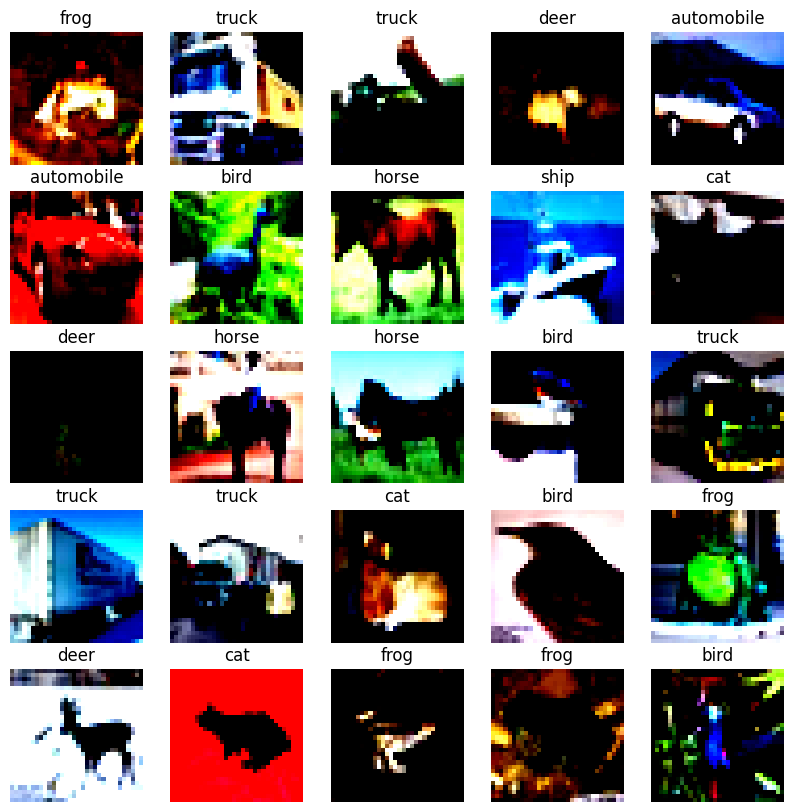

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define class labels for CIFAR-10 dataset
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Convert one-hot encoded labels to integers
y_train_int = np.argmax(y_train, axis=1)

# Display some images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.clip(x_train[i], 0, 1))
    plt.title(class_labels[y_train_int[i]])
    plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Train the model
batch_size = 32
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.6296 - accuracy: 0.4066 - val_loss: 1.2329 - val_accuracy: 0.5628
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2676 - accuracy: 0.5555 - val_loss: 1.1161 - val_accuracy: 0.6127
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1274 - accuracy: 0.6079 - val_loss: 0.9858 - val_accuracy: 0.6556
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0212 - accuracy: 0.6485 - val_loss: 0.9388 - val_accuracy: 0.6759
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9489 - accuracy: 0.6721 - val_loss: 0.8863 - val_accuracy: 0.6926
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8894 - accuracy: 0.6922 - val_loss: 0.8708 - val_accuracy: 0.7001
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8362 - accuracy: 0.7136 - val_loss: 0.8516 - val_accura

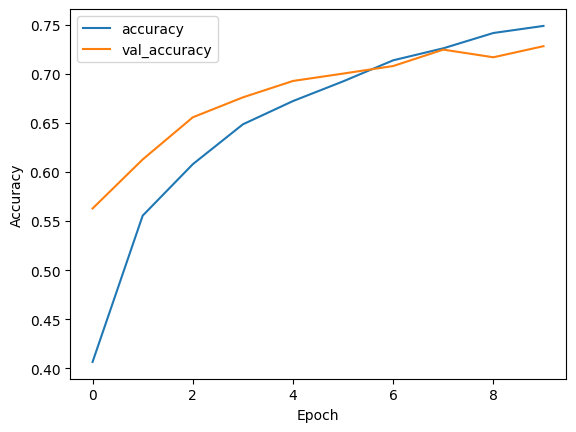

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.8225 - accuracy: 0.7280
Test loss: 0.8224623799324036
Test accuracy: 0.7279999852180481


Further Improvements

Performance Analysis: Analyze the confusion matrix to see which classes are being confused with each other. Plot precision, recall, and F1-score for each class to get a detailed understanding of the model's performance on individual classes.

Model Improvement: Experiment with different architectures (e.g., adding more layers, changing the number of neurons in each layer, etc.) to see if you can improve performance. Adjust hyperparameters such as learning rate, batch size, and dropout rate to see their effect on performance. Consider using regularization techniques like L1 or L2 regularization to prevent overfitting.
Try different data augmentation techniques or increase the amount of augmentation to further improve the model's ability to generalize.

Transfer Learning: If you're not satisfied with the performance of your model, consider using transfer learning with pre-trained models like VGG, ResNet, or Inception. Fine-tuning these models on your dataset can often lead to better results.

Ensemble Learning: Combine the predictions of multiple models (ensemble learning) to improve performance. This can be done by averaging the predictions or using more advanced techniques like stacking.